# Hierarchical clustering: dendogram
Hierarchical clustering is a type of unsupervised machine learning algorithm used to cluster unlabeled data points. Like K-means clustering, hierarchical clustering also groups together the data points with similar characteristics. In some cases the result of hierarchical and K-Means clustering can be similar.


Reminder = There are different ways to find distance between the clusters. The distance itself can be Euclidean or Manhattan distance. Following are some of the options to measure distance between two clusters:

Measure the distance between the closest points of two clusters.
Measure the distance between the farthest points of two clusters.
Measure the distance between the centroids of two clusters.
Measure the distance between all possible combination of points between the two clusters and take the mean.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage  
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn import datasets

# Example 
Suppose we have a collection of data points represented by a numpy array, and plot it

In [2]:
X = np.array([[5,3],  
    [10,15],
    [15,12],
    [24,10],
    [30,30],
    [85,70],
    [71,80],
    [60,78],
    [70,55],
    [80,91],])

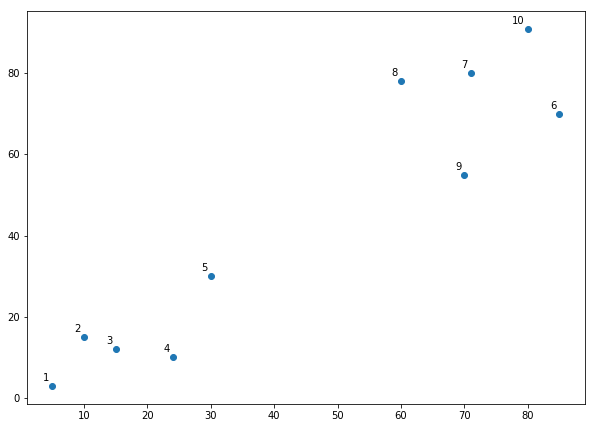

In [3]:
labels = range(1, 11)  
plt.figure(figsize=(10, 7))  
plt.subplots_adjust(bottom=0.1)  
plt.scatter(X[:,0],X[:,1], label='True Position')

for label, x, y in zip(labels, X[:, 0], X[:, 1]):  
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show()  

....  in the real world, we may have thousands of data points in many more than 2 dimensions. In that case it would not be possible to spot clusters with the naked eye. This is why clustering algorithms have been developed.
Let us draw the dendrograms for our data points.
see link below for doc on "linkage" function
https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html

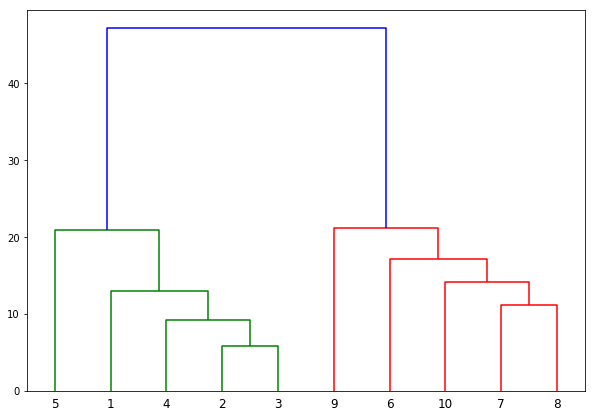

In [4]:
linked = linkage(X, 'single')

labelList = range(1, 11)

plt.figure(figsize=(10, 7))  
dendrogram(linked,  
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()  

the dendograms have been created joining points 2 with 3, and 8 with 7. The vertical height of the dendogram shows the Euclidean distances between points. From Graph2, it can be seen that Euclidean distance between points 8 and 7 is greater than the distance between point 2 and 3.
... and iterate.
Once one big cluster is formed, the longest vertical distance without any horizontal line passing through it is selected and a horizontal line is drawn through it. The number of vertical lines this newly created horizontal line passes is equal to number of clusters.
This latter line is a threshold, which defines the minimum distance required to be a separate cluster. If we draw a line further down, the threshold required to be a new cluster will be decreased and more clusters will be formed.

Below, the line (threshold) is drawn in such a way to define 2 clusters and the obtained labels are represented on a graph. 

[1 1 1 1 1 0 0 0 0 0]


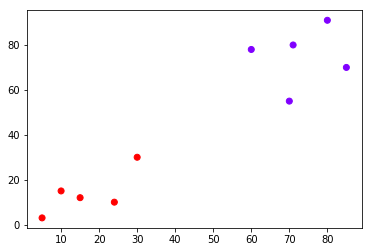

In [5]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(X)  
print(cluster.labels_)  
plt.scatter(X[:,0],X[:,1], c=cluster.labels_, cmap='rainbow')  

In [6]:
iris = datasets.load_iris()

X_train = iris.data
y_train = iris.target

n_classes = len(np.unique(y_train))  #list the unique elements in y_train : nb of different labels

The hierarchy class has a dendrogram method which takes the value returned by the linkage method of the same class. The linkage method takes the dataset and the method to minimize distances as parameters. We use 'ward' as the method since it minimizes then variants of distances between the clusters.

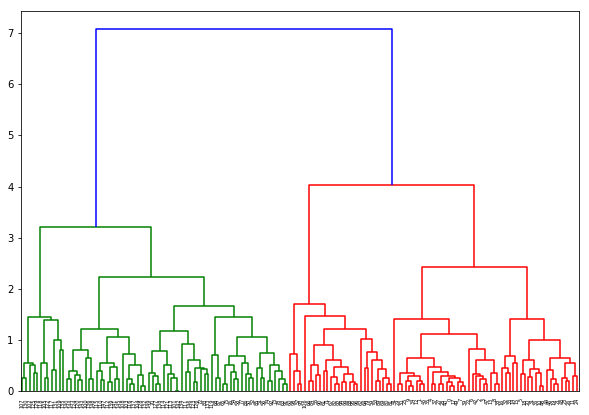

In [7]:
linked = linkage(X_train, 'complete')

plt.figure(figsize=(10, 7))  
dendrogram(linked,  
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()  

 

Agglomerative Clsutering input parameters (see 
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)
* affinity : string or callable, default: “euclidean”
Metric used to compute the linkage. Can be “euclidean”, “l1”, “l2”, “manhattan”, “cosine”, or ‘precomputed’. If linkage is “ward”, only “euclidean” is accepted.
* linkage : {“ward”, “complete”, “average”, “single”}, optional (default=”ward”)
Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion.
ward minimizes the variance of the clusters being merged.
average uses the average of the distances of each observation of the two sets.
complete or maximum linkage uses the maximum distances between all observations of the two sets.
single uses the minimum of the distances between all observations of the two sets.

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


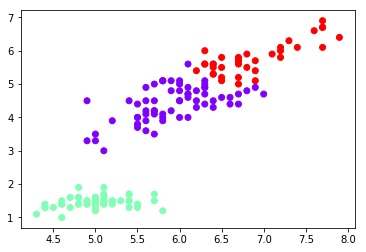

In [8]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster.fit_predict(X_train)  
print(cluster.labels_)  
plt.scatter(X_train[:,0],X_train[:,2], c=cluster.labels_, cmap='rainbow')  